 **Fake News Natural Language Processing project:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 Importing data

In [ ]:
true = pd.read_csv('/content/Fake.csv')

In [ ]:
false = pd.read_csv('/content/True.csv')

 **Checking the data**

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


 Real news is assigned as '1' and fake news is '0'.

In [ ]:
true['truth'] = 1

In [ ]:
false['truth'] = 0

 Checking the information about each dataframe.

In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   truth    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [ ]:
false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   truth    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


Concating the two dataframes together into a single dataframe to analyze.

In [ ]:
news = pd.concat([true,false])

In [ ]:
news.head()

,title,text,subject,date,truth
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


 Checking the numbers of truthful articles and fake news article

In [ ]:
news['truth'].value_counts()

0    23481
1    21417
Name: truth, dtype: int64

 How many different subjects are there in the dataframe?

In [ ]:
news['subject'].unique()
news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Plotting the count of the different subjects in the news in general

In [ ]:
import seaborn as sns

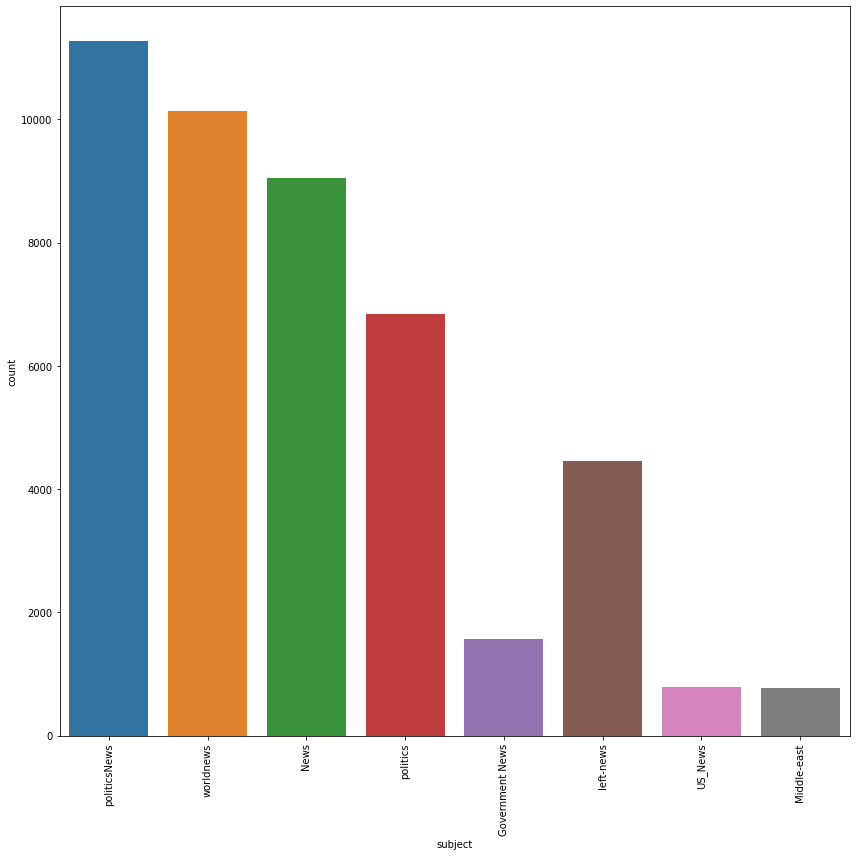

In [ ]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'subject', data = news)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

visualize how much of each subject there is in real news

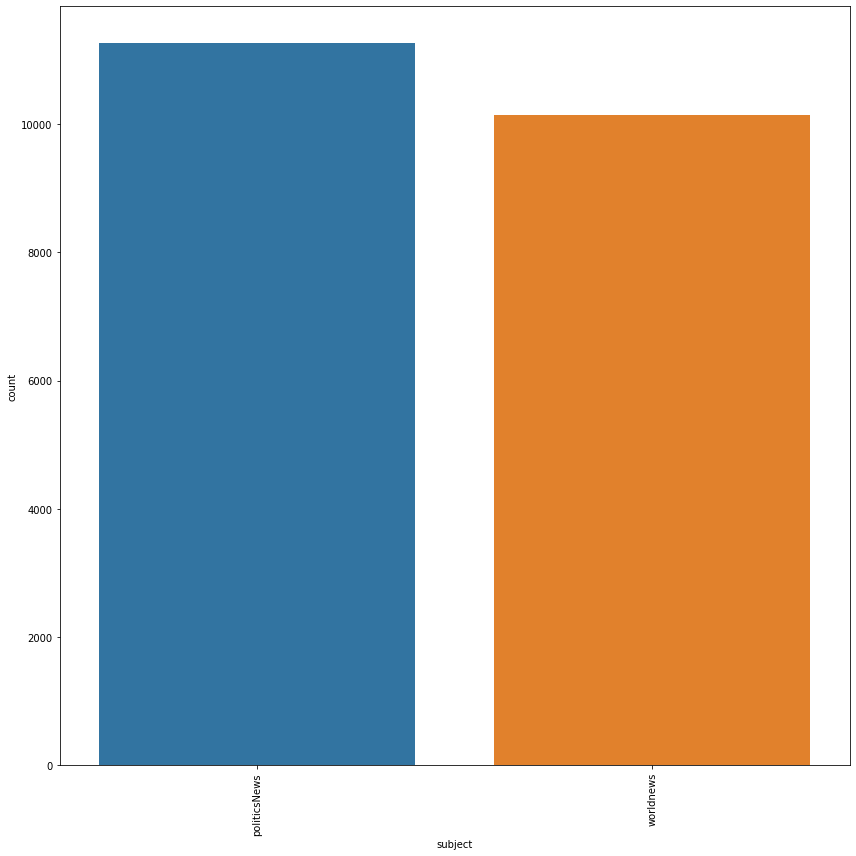

In [ ]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'subject', data = true)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

different subjects in false news.

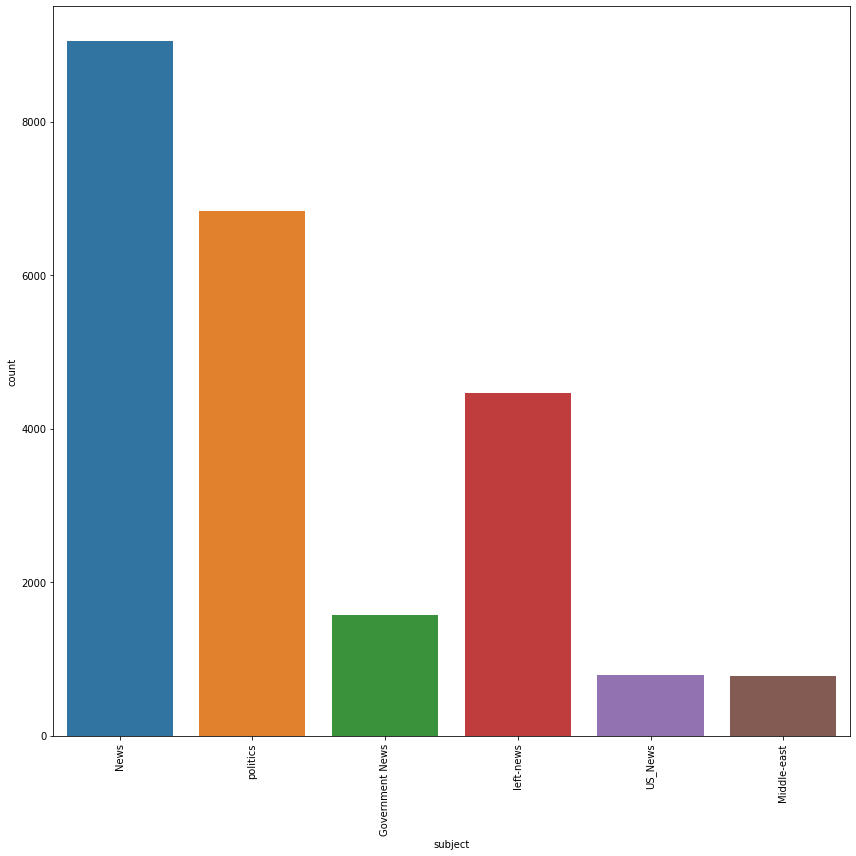

In [ ]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'subject', data = false)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

Creating two new columns, text_length and title_length, which are the word counts of both the text and the title.

In [ ]:
news['text_length'] = news['text'].apply(len)

In [ ]:
news['title_length'] = news['title'].apply(len)

In [ ]:
news.head()

,title,text,subject,date,truth,text_length,title_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204,69


The X axis is 'truth', and the Y axis is the length of the text or the title, respectively. The different colors represent the subject.

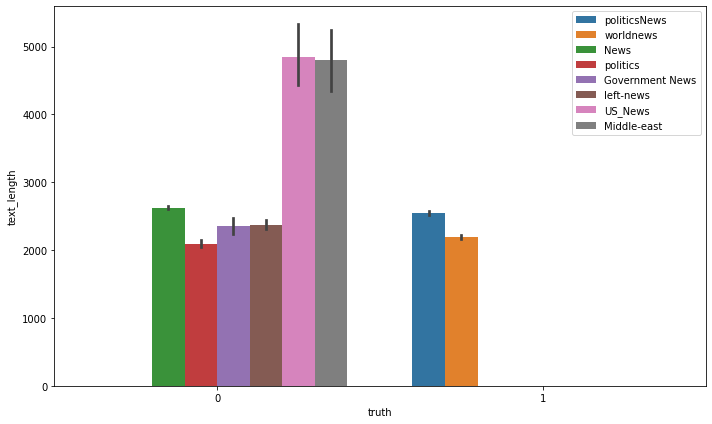

In [ ]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'truth', y = 'text_length', data = news, hue = 'subject')
#plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()
plt.legend(loc='upper right')

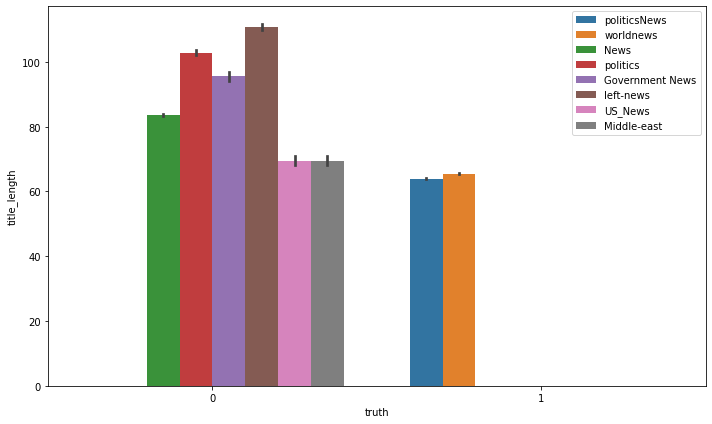

In [ ]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'truth', y = 'title_length', data = news, hue = 'subject')
#plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()
plt.legend(loc='upper right')

Graphing the text lengths to both real and fake news.

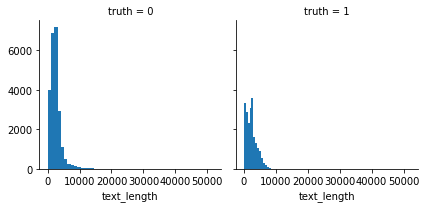

In [ ]:
g = sns.FacetGrid(data = news, col = 'truth')
g.map(plt.hist, 'text_length', bins = 50)

 percent of texts are longer than 10k words

In [ ]:
news[news['text_length'] >= 10000].count() / news['text_length'].count()

title           0.00784
text            0.00784
subject         0.00784
date            0.00784
truth           0.00784
text_length     0.00784
title_length    0.00784
dtype: float64

Dropping texts that are longer than 10k words in length.

In [ ]:
news.drop(news[news['text_length'] >= 10000].index, inplace = True)

In [ ]:
news[news['text_length'] >= 10000].count() / news['text_length'].count()

title           0.0
text            0.0
subject         0.0
date            0.0
truth           0.0
text_length     0.0
title_length    0.0
dtype: float64

In [ ]:
news.head()

,title,text,subject,date,truth,text_length,title_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204,69


 Graphing the length of titles for fake and real news.

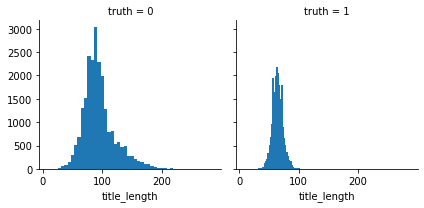

In [ ]:
g = sns.FacetGrid(data = news, col = 'truth')
g.map(plt.hist, 'title_length', bins = 50)


percentage of titles are over 200 words

In [ ]:
news[news['title_length'] >= 200].count() / news['title_length'].count()

title           0.001644
text            0.001644
subject         0.001644
date            0.001644
truth           0.001644
text_length     0.001644
title_length    0.001644
dtype: float64

In [ ]:
news.drop(news[news['title_length'] >= 200].index, inplace = True)

In [ ]:
#news[news['title_length'] >= 200].count() / news['title_length'].count()
news[news['title_length'] >= 200].count() / news['title_length'].count()

title           0.0
text            0.0
subject         0.0
date            0.0
truth           0.0
text_length     0.0
title_length    0.0
dtype: float64

Creating the X and Y, where X is the text of the news, and y is either fake news (0) or real news (1).

In [ ]:
X = news['text']

In [ ]:
y = news['truth']

Importing CountVectorizer, fitting_transforming X, and resetting X to the fit_transformed.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(X)

Train_test_splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Importing Multinomial Naive Bayes, then training the model.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_train, y_train)

MultinomialNB()

Predicting and checking how well the model performed.

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[6490  381]
 [ 305 6100]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6871
           1       0.94      0.95      0.95      6405

    accuracy                           0.95     13276
   macro avg       0.95      0.95      0.95     13276
weighted avg       0.95      0.95      0.95     13276



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [ ]:
X = news['text']
y = news['truth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[6487  384]
 [ 489 5916]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6871
           1       0.94      0.92      0.93      6405

    accuracy                           0.93     13276
   macro avg       0.93      0.93      0.93     13276
weighted avg       0.93      0.93      0.93     13276

